In [1]:
import pandas  as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
df=pd.read_csv('../data/raw/complaints.csv')


C:\Users\Hp\AppData\Local\Temp\ipykernel_12068\2832514422.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/raw/complaints.csv')


In [2]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609792,2016-09-08,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting my free annual report,NaN,NaN,"EQUIFAX, INC.",FL,32853,NaN,Consent not provided,Web,2016-09-08,Closed with explanation,Yes,Yes,2102374
9609793,2022-06-06,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",CA,93638,NaN,Consent not provided,Web,2022-06-06,Closed with explanation,Yes,NaN,5637858
9609794,2016-07-14,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,"EQUIFAX, INC.",NJ,08620,"Older American, Servicemember",NaN,Phone,2016-07-14,Closed with explanation,Yes,No,2012835
9609795,2014-03-03,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,NaN,NaN,"EQUIFAX, INC.",NJ,08759,NaN,NaN,Web,2014-03-04,Closed with explanation,Yes,No,740118


In [3]:
df.isna().sum()

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64

C:\Users\Hp\AppData\Local\Temp\ipykernel_12068\4266630273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='Product',y='Consumer complaint narrative',palette='viridis')


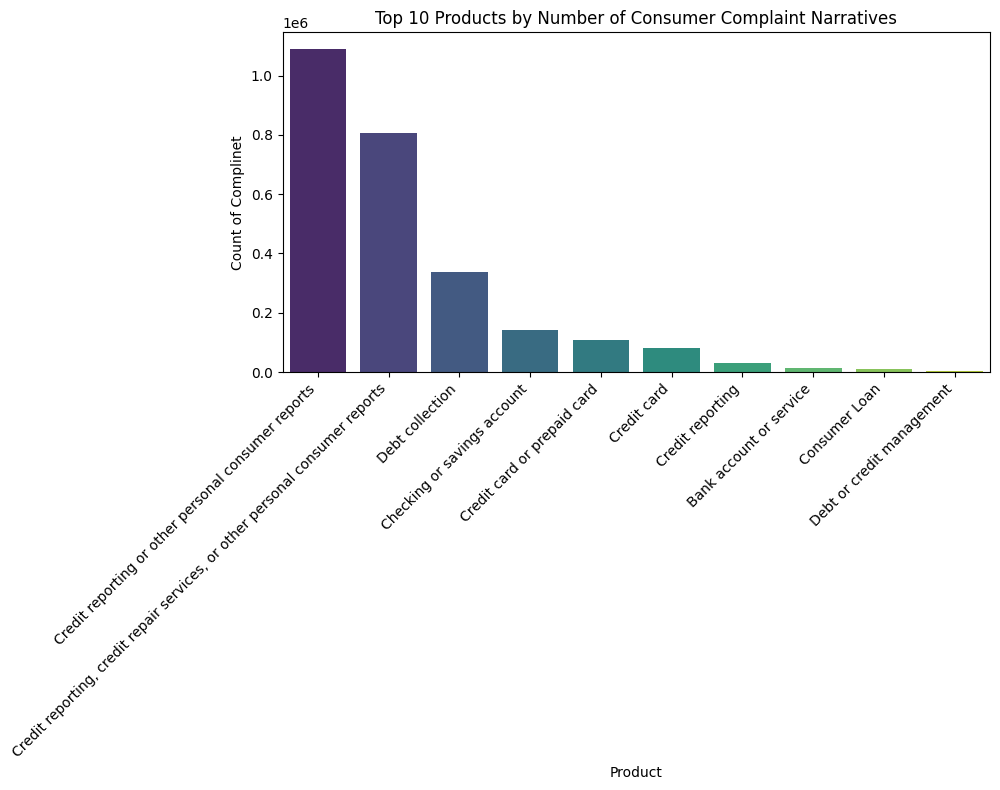

In [4]:

plt.figure(figsize=(10,8))

data=df[df['Consumer complaint narrative'].notnull()].groupby('Product')['Consumer complaint narrative'].count().head(10).sort_values(ascending=False).reset_index()
sns.barplot(data=data,x='Product',y='Consumer complaint narrative',palette='viridis')
plt.xlabel('Product')
plt.ylabel('Count of Complinet')
plt.title('Top 10 Products by Number of Consumer Complaint Narratives')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [5]:
df['word_count'] = df['Consumer complaint narrative'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

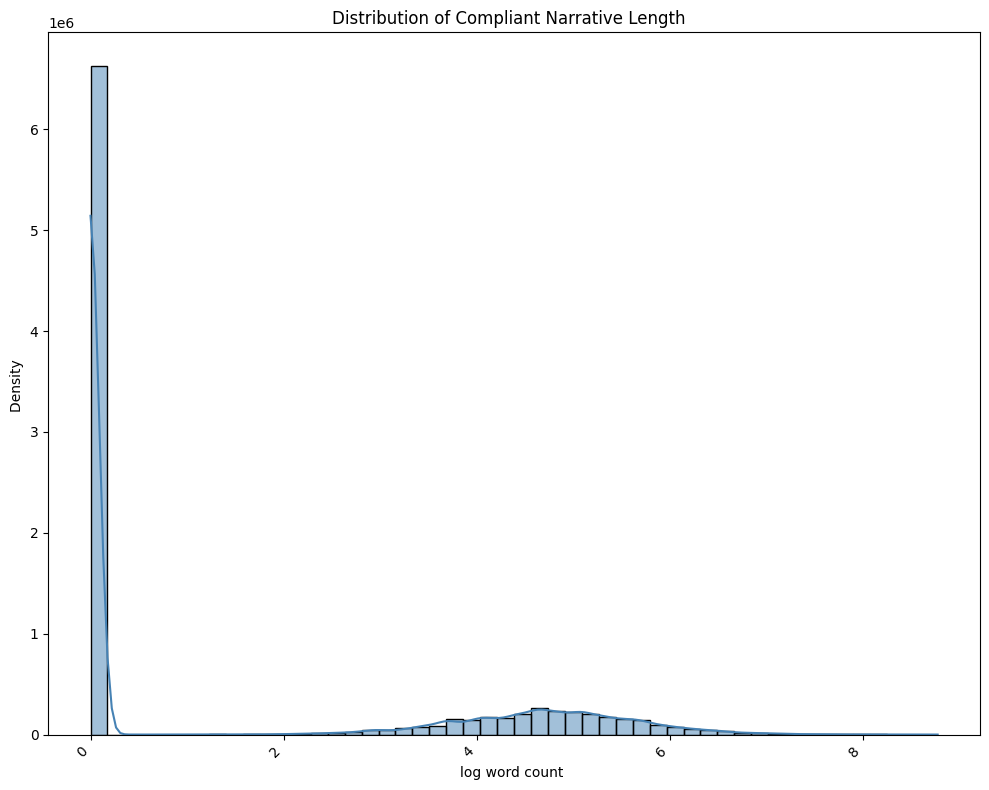

In [6]:

plt.figure(figsize=(10,8))
import numpy as np

sns.histplot(data=np.log1p(df['word_count']),bins=50,kde=True,color='steelblue')

plt.xlabel('log word count ')
plt.ylabel('Density ')
plt.title('Distribution of Compliant Narrative Length  ')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [7]:

shor_word=df[df['word_count']<10]
long_word=df[df['word_count'] >500]
print(len(shor_word)/len(df['word_count']))
print(len(long_word)/len(df['word_count']))

0.6921040059431016
0.016752591131737746


C:\Users\Hp\AppData\Local\Temp\ipykernel_12068\140190526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='Has_narrative',y='count',palette='viridis')


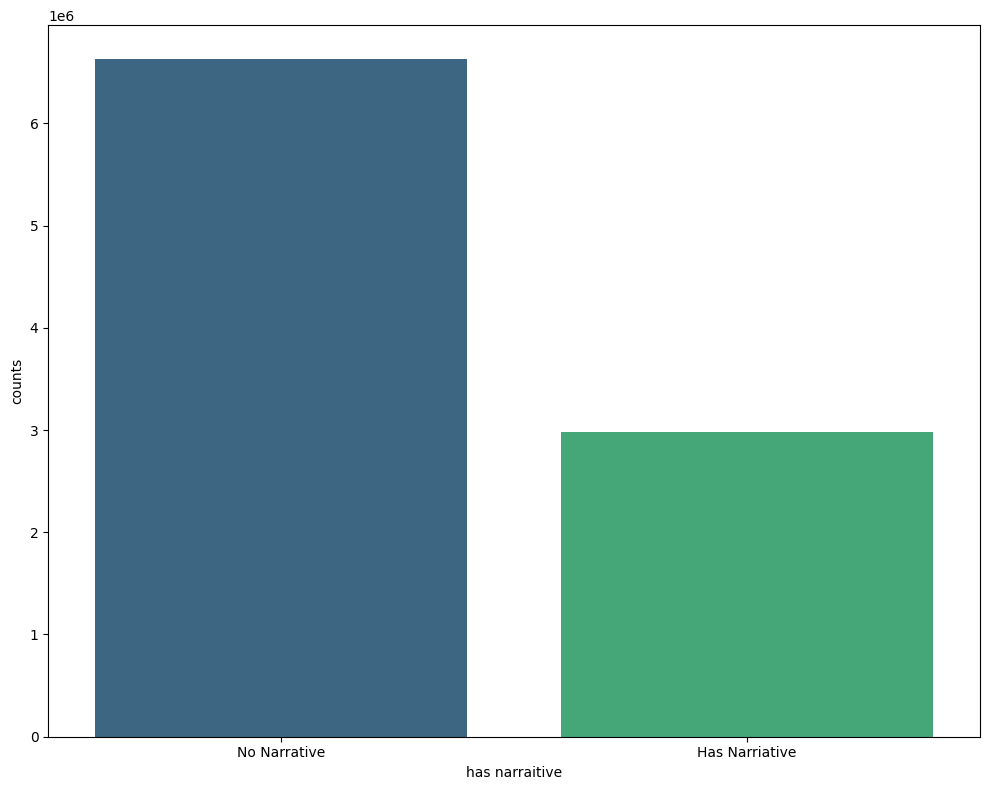

In [8]:
data=df['Consumer complaint narrative'].notnull().value_counts().reset_index()
data.columns=['Has_narrative','count']
plt.figure(figsize=(10,8))
sns.barplot(data=data,x='Has_narrative',y='count',palette='viridis')
plt.xlabel('has narraitive')
plt.ylabel('counts')
plt.xticks([0,1],['No Narrative', 'Has Narriative'])
plt.tight_layout()
plt.show()

In [9]:
arguments = ['Credit card', 'personal loan', 'Money transfer','Money transfers', 'Payday loan, title loan, personal loan, or advance loan','Payday loan, title loan, or personal loan','Checking or savings account']

new_data = df[df['Consumer complaint narrative'].notnull() & df['Product'].isin(arguments)]
changedata=new_data[['Product','Consumer complaint narrative','Complaint ID']]



In [10]:
import re
def clean_text(text):
    text=text.lower()
    text=re.sub(r'[^a-z0-9\s]','',text)
    text=re.sub(r'\b(I am writing to file a complaint|i am submitting this|dear sir or madam)','',text)
    text=text.strip()
    text=re.sub(r'\n'," ",text)
    text=re.sub(r'\s+'," ",text)
    return text
changedata['Consumer complaint narrative']=changedata['Consumer complaint narrative'].apply(clean_text)
changedata.to_csv('../data/filtered_complaints.csv',index=False)
    

C:\Users\Hp\AppData\Local\Temp\ipykernel_12068\2235071131.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changedata['Consumer complaint narrative']=changedata['Consumer complaint narrative'].apply(clean_text)
